In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
golddata=pd.read_csv("gld_price_data.csv")

In [6]:
golddata.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
golddata.tail(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
golddata.shape

(2290, 6)

In [14]:
golddata.shape[1]

6

In [16]:
golddata.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [17]:
golddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
golddata.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [20]:
correlation=golddata.corr()

<AxesSubplot:>

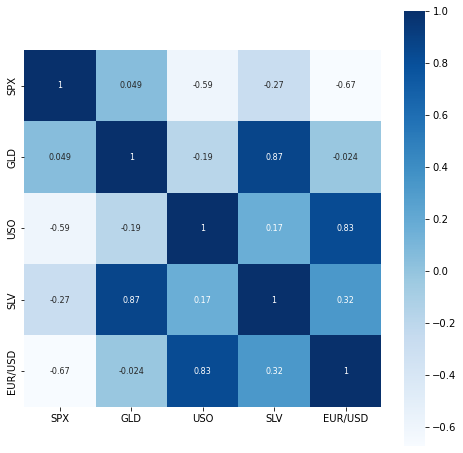

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True ,annot=True, annot_kws={'size':8}, cmap='Blues')

<AxesSubplot:>

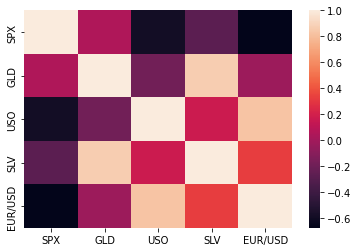

In [31]:
sns.heatmap(correlation)

In [33]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

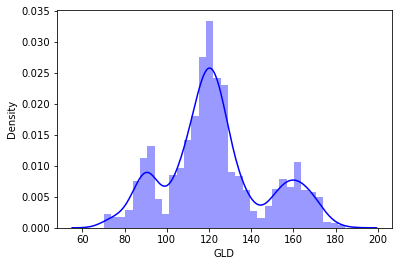

In [37]:
sns.distplot(golddata['GLD'], color='blue')

In [40]:
X=golddata.drop(['Date','GLD'],axis=1)
Y=golddata['GLD']

In [42]:
print (Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [44]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [47]:
regressor=RandomForestRegressor(n_estimators=100)

In [50]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [51]:
test_data_prediction=regressor.predict(X_test)

In [52]:
print(test_data_prediction)

[168.10179932  81.95690002 115.96210062 127.68110104 120.77660125
 154.6833981  150.57059884 126.11740041 117.55979878 126.04020038
 116.58710101 172.19470123 141.59169802 167.49919802 115.04669982
 117.81830076 139.70460296 170.01160043 159.29750295 159.63940005
 155.13009973 125.52270022 176.42539986 157.307403   125.25120035
  93.92840002  77.33130011 120.27590027 119.00229905 167.47680017
  88.26780061 125.10359962  91.30260079 117.59850052 121.00979927
 136.59920093 115.47190112 114.98630107 147.19509979 106.9613012
 104.32690237  87.21809817 126.61800044 118.25599987 154.64009876
 119.57320001 108.30950001 108.10809813  93.14780088 127.0151983
  75.43350003 113.65189901 121.41380009 111.01559923 118.86199874
 120.96239886 158.83430042 167.33490128 146.89839705  85.90189872
  94.10830004  86.8441989   90.58780035 118.83600075 126.45130062
 127.49340019 170.29350033 122.33439943 117.64009895  98.53910002
 168.58030079 143.19619831 132.73100241 121.15970201 121.52349915
 119.6655005

In [53]:
error_score= metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9899670448486473


In [57]:
Y_test=list(Y_test)
           

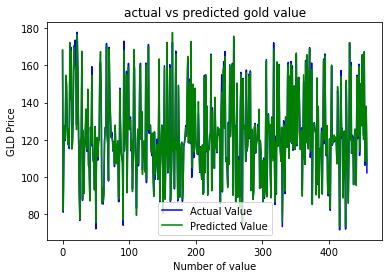

In [62]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('actual vs predicted gold value')
plt.xlabel('Number of value')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
